# **DataSet**

In [2]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sihamtaouzi","key":"ddd8b1bc1f573a9cb5d8c044e737336b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation


Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0
 89% 638M/714M [00:03<00:01, 53.7MB/s]
100% 714M/714M [00:03<00:00, 200MB/s] 


In [5]:
import zipfile, os

zip_path = "/content/lgg-mri-segmentation.zip"
extract_path = "/content/dataset"

# Création du dossier de destination s'il n'existe pas
os.makedirs(extract_path, exist_ok=True)

# Extraction avec affichage de la progression
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Nombre de fichiers dans l'archive :", len(zip_ref.namelist()))
    zip_ref.extractall(extract_path)

print(" Extraction terminée.")



Nombre de fichiers dans l'archive : 15720
 Extraction terminée.


In [6]:
!ls /content/dataset | head -n 20


kaggle_3m
lgg-mri-segmentation


In [7]:
!find /content/dataset/kaggle_3m -type f -name "*.tif" | head -n 10


/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_9.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_31_mask.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_6.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_9_mask.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_11.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_11_mask.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_27_mask.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_30_mask.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_8.tif
/content/dataset/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_7_mask.tif


In [8]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Dossier racine
data_path = "/content/dataset/kaggle_3m"

# Taille cible (tu peux aussi mettre 256 si ta VRAM le permet)
IMG_SIZE = 128

# Listes pour stocker les données
images = []
masks = []

# Parcours des sous-dossiers
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".tif") and not file.endswith("_mask.tif"):
            img_path = os.path.join(root, file)
            mask_path = img_path.replace(".tif", "_mask.tif")

            # Vérifie que le masque correspondant existe
            if os.path.exists(mask_path):
                # Lecture et redimensionnement
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

                # Normalisation et binarisation
                img = img / 255.0
                mask = (mask > 0).astype(np.float32)

                images.append(img)
                masks.append(mask)

# Conversion en tableaux numpy
images = np.array(images)
masks = np.array(masks).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Total images chargées :", images.shape)
print("Total masques chargés :", masks.shape)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    images, masks, test_size=0.2, random_state=42
)

print("Entraînement :", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Total images chargées : (3929, 128, 128, 3)
Total masques chargés : (3929, 128, 128, 1)
Entraînement : (3143, 128, 128, 3) (3143, 128, 128, 1)
Test : (786, 128, 128, 3) (786, 128, 128, 1)


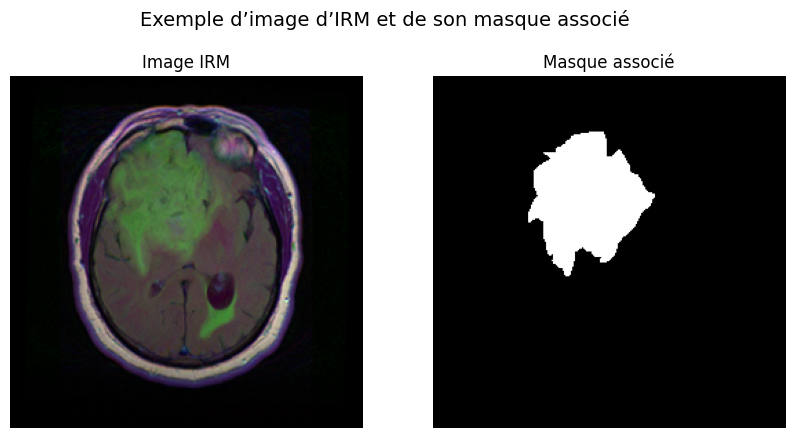

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Exemple : chemin vers ton dossier d'images
base_path = "/content/dataset/kaggle_3m"

# Sélectionner un dossier au hasard
folder = random.choice(os.listdir(base_path))
folder_path = os.path.join(base_path, folder)

# Récupérer les fichiers image et masque
images = [f for f in os.listdir(folder_path) if f.endswith('.tif') and 'mask' not in f]
masks = [f for f in os.listdir(folder_path) if 'mask' in f]

# Choisir une image au hasard
idx = random.randint(0, len(images) - 1)
img_path = os.path.join(folder_path, images[idx])
mask_path = os.path.join(folder_path, images[idx].replace('.tif', '_mask.tif'))

# Charger les deux fichiers
image = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Conversion BGR → RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Affichage côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("Image IRM")
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Masque associé")
axs[1].axis('off')

plt.suptitle("Exemple d’image d’IRM et de son masque associé", fontsize=14)
plt.show()
plt.savefig("exemple_mri.png")


In [26]:
from google.colab import files
files.download('exemple_mri.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)

    # --- ENCODER ---
    c1 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)

    c3 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2,2))(c3)

    c4 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(c4)
    d4 = layers.Dropout(0.5)(c4)
    p4 = layers.MaxPooling2D((2,2))(d4)

    # --- BOTTLENECK ---
    c5 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(c5)
    d5 = layers.Dropout(0.5)(c5)

    # --- DECODER ---
    u6 = layers.Conv2DTranspose(512, (2,2), strides=(2,2), padding='same')(d5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3,3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3,3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# --- Créer et compiler le modèle ---
unet = unet_model()
unet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),
             loss='binary_crossentropy',
             metrics=['accuracy'])

unet.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 8, 8,      │          0 │ conv2d_9[0][0]  

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# --- Entraînement avec callbacks ---
history = unet.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=1,
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)




Epoch 1/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 144s 39ms/step - accuracy: 0.9890 - loss: 0.0830 - val_accuracy: 0.9890 - val_loss: 0.0484 - learning_rate: 0.0100
Epoch 2/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 121s 38ms/step - accuracy: 0.9898 - loss: 0.0458 - val_accuracy: 0.9890 - val_loss: 0.0414 - learning_rate: 0.0100
Epoch 3/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 121s 38ms/step - accuracy: 0.9891 - loss: 0.0403 - val_accuracy: 0.9890 - val_loss: 0.0362 - learning_rate: 0.0100
Epoch 4/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 121s 38ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9890 - val_loss: 0.0325 - learning_rate: 0.0100
Epoch 5/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 121s 38ms/step - accuracy: 0.9888 - loss: 0.0328 - val_accuracy: 0.9890 - val_loss: 0.0312 - learning_rate: 0.0100
Epoch 6/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 142s 39ms/step - accuracy: 0.9885 - loss: 0.0330 - val_accuracy: 0.9916 - val_loss: 0.0305 - learning_rate: 0.0100
Epoch 7/50
3143/3143 ━━━━━━━━━━━━━━━━━━━━ 121s 38ms/step -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

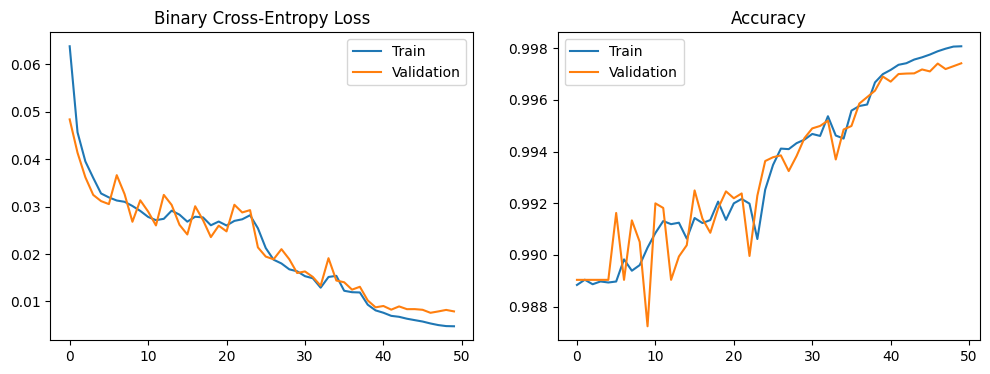

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [15]:
# --- Courbes de performance ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Binary Cross-Entropy Loss')
plt.legend()
plt.savefig('loss.png')
from google.colab import files
files.download('loss.png')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy.png')
from google.colab import files
files.download('accuracy.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


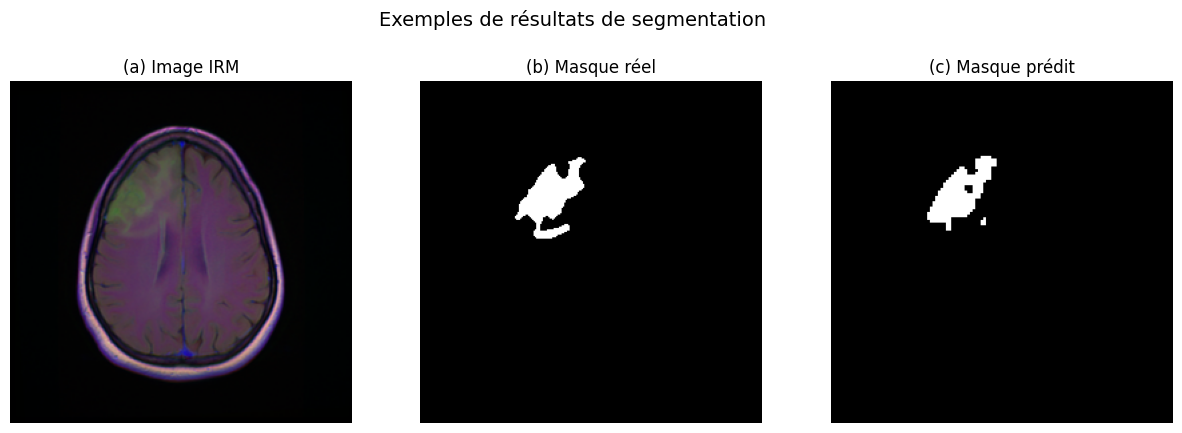

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# --- Chemin vers ton dossier de test ---
test_path = "/content/dataset/kaggle_3m"

# --- Choisir un dossier au hasard ---
folder = random.choice(os.listdir(test_path))
folder_path = os.path.join(test_path, folder)

# --- Sélectionner une image et son masque réel ---
images = [f for f in os.listdir(folder_path) if f.endswith('.tif') and 'mask' not in f]
img_name = random.choice(images)

img_path = os.path.join(folder_path, img_name)
mask_path = os.path.join(folder_path, img_name.replace('.tif', '_mask.tif'))

# --- Charger l’image et le masque réel ---
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask_real = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# --- Prétraiter l’image pour la prédiction ---
img_resized = cv2.resize(img_rgb, (128, 128))
img_norm = img_resized / 255.0
img_input = np.expand_dims(img_norm, axis=0)

# --- Prédiction du masque ---
pred_mask = unet.predict(img_input)[0]
pred_mask = (pred_mask > 0.5).astype(np.uint8)  # seuillage
pred_mask_resized = cv2.resize(pred_mask, (img_rgb.shape[1], img_rgb.shape[0]))

# --- Affichage côte à côte ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_rgb)
axs[0].set_title("(a) Image IRM")
axs[0].axis('off')

axs[1].imshow(mask_real, cmap='gray')
axs[1].set_title("(b) Masque réel")
axs[1].axis('off')

axs[2].imshow(pred_mask_resized, cmap='gray')
axs[2].set_title("(c) Masque prédit")
axs[2].axis('off')

plt.suptitle("Exemples de résultats de segmentation", fontsize=14)
plt.show()
plt.savefig('Exemples de résultats de segmentation.png')
from google.colab import files
files.download('Exemples de résultats de segmentation.png')